In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
#load in the data frame

df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/Naive_Bayes/Naive_Bayes_Data.csv')
#change the rank_category 0 to bad, 1 to okay and 2 to good
df['rank_category'] = df['rank_category'].replace(0, 'bad')
df['rank_category'] = df['rank_category'].replace(1, 'okay')
df['rank_category'] = df['rank_category'].replace(2, 'good')
df.drop('tournament', axis=1, inplace=True)
df.head()

,rank_category,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,good,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch
1,good,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me
2,good,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet
3,good,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick
4,good,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind


# Tree 1

In [85]:
# Select features and target variable
features = ['pokemon','item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4']
target = 'rank_category'

features = df[features]
target = df[target]

# Encode the categorical features
features = features.apply(LabelEncoder().fit_transform)
features

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,80,16,48,4,44,38,32,198
1,84,41,68,6,157,103,226,62
2,130,38,137,18,31,188,26,6
3,58,3,91,0,39,216,56,102
4,135,22,82,1,110,52,114,178
...,...,...,...,...,...,...,...,...
4447,124,38,82,8,10,99,198,131
4448,130,12,137,1,192,25,193,196
4449,117,49,17,16,38,38,129,131
4450,25,80,134,9,190,127,46,131


In [86]:
# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)


In [87]:
X_train

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
3223,132,80,33,18,58,143,225,140
872,83,53,109,8,127,99,125,8
2282,58,3,91,18,52,216,42,76
2558,130,14,137,18,5,25,195,196
627,54,77,89,18,4,68,88,193
...,...,...,...,...,...,...,...,...
2580,2,22,94,1,159,24,153,128
1945,130,14,137,9,168,25,216,89
4391,37,16,87,10,110,165,101,180
986,35,97,2,6,128,32,130,193


In [88]:
X_test

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
3107,53,86,56,8,95,217,136,52
3961,18,38,119,8,88,185,165,131
4078,84,41,68,6,94,218,71,165
3900,53,86,56,8,59,132,56,96
949,37,17,88,4,29,165,125,124
...,...,...,...,...,...,...,...,...
2374,100,3,42,12,52,218,78,196
3506,130,38,137,8,31,185,26,203
104,37,7,87,12,127,32,101,110
1970,130,14,137,18,186,188,26,6


In [89]:
##Instantiate the decision tree using the defaults.
MyDT_Classifier = DecisionTreeClassifier(criterion='gini')
## Use fit to create the decision tree model
MyDT_Classifier = MyDT_Classifier.fit(X_train, y_train)

FeatureNames=X_train.columns.values ## get all the feature/variable names
print(FeatureNames)
ClassNames=MyDT_Classifier.classes_ ## Get the class names
print(ClassNames)

['pokemon' 'item' 'ability' 'tera type' 'move_1' 'move_2' 'move_3'
 'move_4']
['bad' 'good' 'okay']


In [90]:
##Tree Plot Option 1
# cut off the tree at the 3rd level
plt.figure(figsize=(35,20))
MyPlot=tree.plot_tree(MyDT_Classifier, 
                   feature_names=FeatureNames,  
                   class_names=ClassNames,
                   filled=True,
                   max_depth=3)
## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## To see the tree, open this file on your computer :)
## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
plt.savefig("PokemonTree1.jpg")
plt.close()

In [91]:
# Use the Tree to make predictions
y_pred = MyDT_Classifier.predict(X_test)

# Calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print(report)

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)




Accuracy: 0.42536475869809204
              precision    recall  f1-score   support

         bad       0.25      0.26      0.25       222
        good       0.18      0.16      0.17       153
        okay       0.57      0.58      0.57       516

    accuracy                           0.43       891
   macro avg       0.33      0.33      0.33       891
weighted avg       0.42      0.43      0.42       891

[[ 57  35 130]
 [ 34  25  94]
 [141  78 297]]


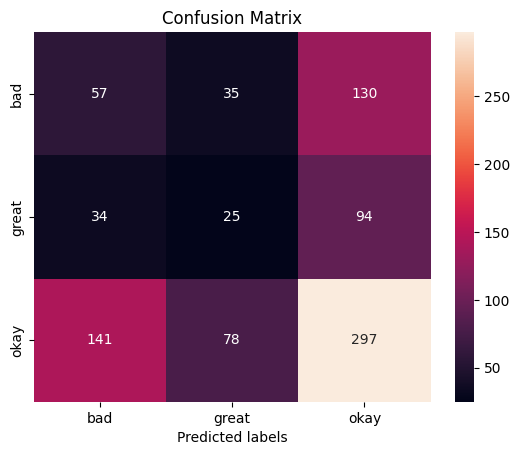

In [92]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'great', 'okay']); ax.yaxis.set_ticklabels(['bad', 'great', 'okay']);
#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Decision_Tree_1_Confusion_Matrix.png')
plt.show()




# Tree 2

In [93]:
##Instantiate the decision tree using the defaults.
MyDT_Classifier = DecisionTreeClassifier(criterion='entropy')
## Use fit to create the decision tree model
MyDT_Classifier = MyDT_Classifier.fit(X_train, y_train)

FeatureNames=X_train.columns.values ## get all the feature/variable names
print(FeatureNames)
ClassNames=MyDT_Classifier.classes_ ## Get the class names
print(ClassNames)

##Tree Plot 
# cut off the tree at the 4th level
plt.figure(figsize=(40,25))
MyPlot=tree.plot_tree(MyDT_Classifier, 
                   feature_names=FeatureNames,  
                   class_names=ClassNames,
                   filled=True,
                   max_depth=3)

plt.savefig("PokemonTree2.jpg")
plt.close()

# Use the Tree to make predictions
y_pred = MyDT_Classifier.predict(X_test)

# Calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print(report)

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


['pokemon' 'item' 'ability' 'tera type' 'move_1' 'move_2' 'move_3'
 'move_4']
['bad' 'good' 'okay']
Accuracy: 0.3950617283950617
              precision    recall  f1-score   support

         bad       0.22      0.24      0.23       222
        good       0.14      0.12      0.13       153
        okay       0.54      0.54      0.54       516

    accuracy                           0.40       891
   macro avg       0.30      0.30      0.30       891
weighted avg       0.39      0.40      0.39       891

[[ 54  35 133]
 [ 34  19 100]
 [156  81 279]]


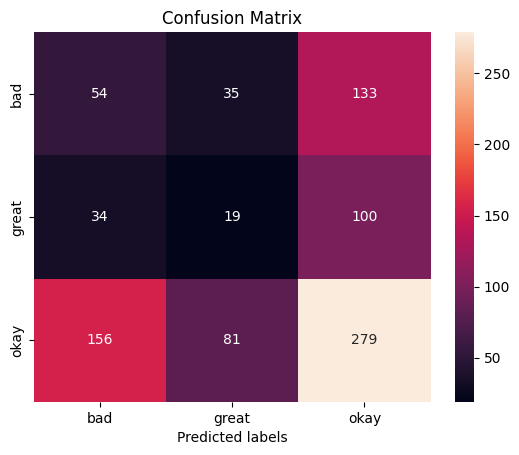

In [94]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'great', 'okay']); ax.yaxis.set_ticklabels(['bad', 'great', 'okay']);
#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Decision_Tree_2_Confusion_Matrix.png')
plt.show()

# Tree 3

In [95]:
##Instantiate the decision tree using the defaults.
MyDT_Classifier = DecisionTreeClassifier(splitter='random')
## Use fit to create the decision tree model
MyDT_Classifier = MyDT_Classifier.fit(X_train, y_train)

FeatureNames=X_train.columns.values ## get all the feature/variable names
print(FeatureNames)
ClassNames=MyDT_Classifier.classes_ ## Get the class names
print(ClassNames)

##Tree Plot 
# cut off the tree at the 4th level
plt.figure(figsize=(40,25))
MyPlot=tree.plot_tree(MyDT_Classifier, 
                   feature_names=FeatureNames,  
                   class_names=ClassNames,
                   filled=True,
                   max_depth=3)

plt.savefig("PokemonTree3.jpg")
plt.close()

# Use the Tree to make predictions
y_pred = MyDT_Classifier.predict(X_test)

# Calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print(report)

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

['pokemon' 'item' 'ability' 'tera type' 'move_1' 'move_2' 'move_3'
 'move_4']
['bad' 'good' 'okay']
Accuracy: 0.41975308641975306
              precision    recall  f1-score   support

         bad       0.22      0.24      0.23       222
        good       0.19      0.17      0.18       153
        okay       0.58      0.57      0.57       516

    accuracy                           0.42       891
   macro avg       0.33      0.33      0.33       891
weighted avg       0.42      0.42      0.42       891

[[ 54  39 129]
 [ 40  26  87]
 [148  74 294]]


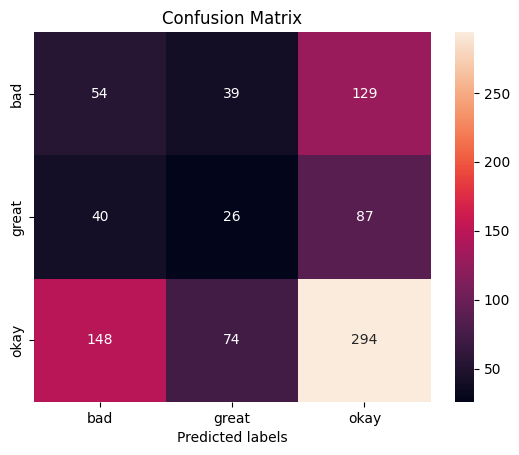

In [96]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'great', 'okay']); ax.yaxis.set_ticklabels(['bad', 'great', 'okay']);
#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Decision_Tree_3_Confusion_Matrix.png')
plt.show()